In [8]:
# Load and Merge the Datasets
import pandas as pd

customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')
print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00761      C0199      P022  2024-10-01 05:57:09         4   
2        T00626      C0199      P079  2024-08-17 12:06:08         2   
3        T00963      C0199      P008  2024-10-26 00:01:58         2   
4        T00112      C0146      P067  2024-05-27 22:23:54         1   

   TotalValue   Price     CustomerName  Region  SignupDate  
0      300.68  300.68   Andrea Jenkins  Europe  2022-12-03  
1      550.16  137.54   Andrea Jenkins  Europe  2022-12-03  
2      834.74  417.37   Andrea Jenkins  Europe  2022-12-03  
3      293.70  146.85   Andrea Jenkins  Europe  2022-12-03  
4      300.68  300.68  Brittany Harvey    Asia  2024-09-04  


In [9]:
#Feature Engineering
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
transaction_count = merged_df.groupby('CustomerID').size().reset_index(name='TransactionCount')
total_transaction_value = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index(name='TotalTransactionValue')
average_transaction_value = merged_df.groupby('CustomerID')['TotalValue'].mean().reset_index(name='AvgTransactionValue')

merged_df['DaysSinceSignup'] = (pd.to_datetime('today') - merged_df['SignupDate']).dt.days
days_since_signup = merged_df.groupby('CustomerID')['DaysSinceSignup'].mean().reset_index(name='DaysSinceSignup')

features_df = transaction_count.merge(total_transaction_value, on='CustomerID')\
                               .merge(average_transaction_value, on='CustomerID')\
                               .merge(days_since_signup, on='CustomerID')

print(features_df.head())

  CustomerID  TransactionCount  TotalTransactionValue  AvgTransactionValue  \
0      C0001                 5                3354.52              670.904   
1      C0002                 4                1862.74              465.685   
2      C0003                 4                2725.38              681.345   
3      C0004                 8                5354.88              669.360   
4      C0005                 3                2034.24              678.080   

   DaysSinceSignup  
0            931.0  
1           1078.0  
2            325.0  
3            840.0  
4            895.0  


In [21]:
#Performing  K-means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df.drop('CustomerID', axis=1))
X = scaler.fit_transform(merged_data[['CustomerID', 'ProductID']])  

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
features_df['Cluster'] = kmeans.fit_predict(scaled_features)

db_index = davies_bouldin_score(scaled_features, features_df['Cluster'])
silhouette_avg = silhouette_score(scaled_features, features_df['Cluster'])
calinski_harabasz = calinski_harabasz_score(scaled_features, features_df['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')
print(f'silhouette_score: {silhouette_avg}')
print(f'calinski_harabasz_score: {calinski_harabasz}')


Davies-Bouldin Index: 0.9480551510303508
silhouette_score: 0.37960699009061377
calinski_harabasz_score: 112.7765785551975


C:\Users\dhars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


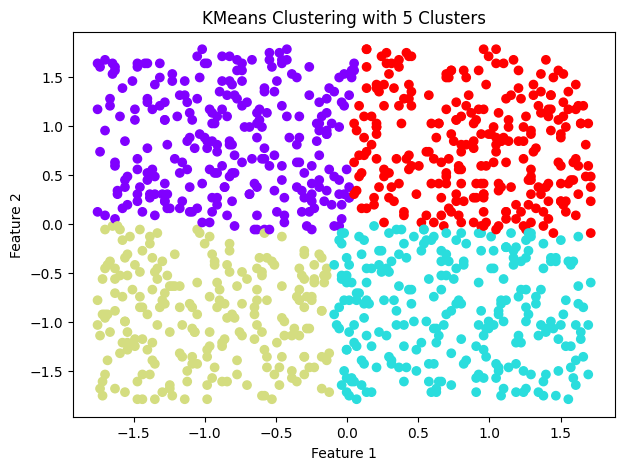

C:\Users\dhars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


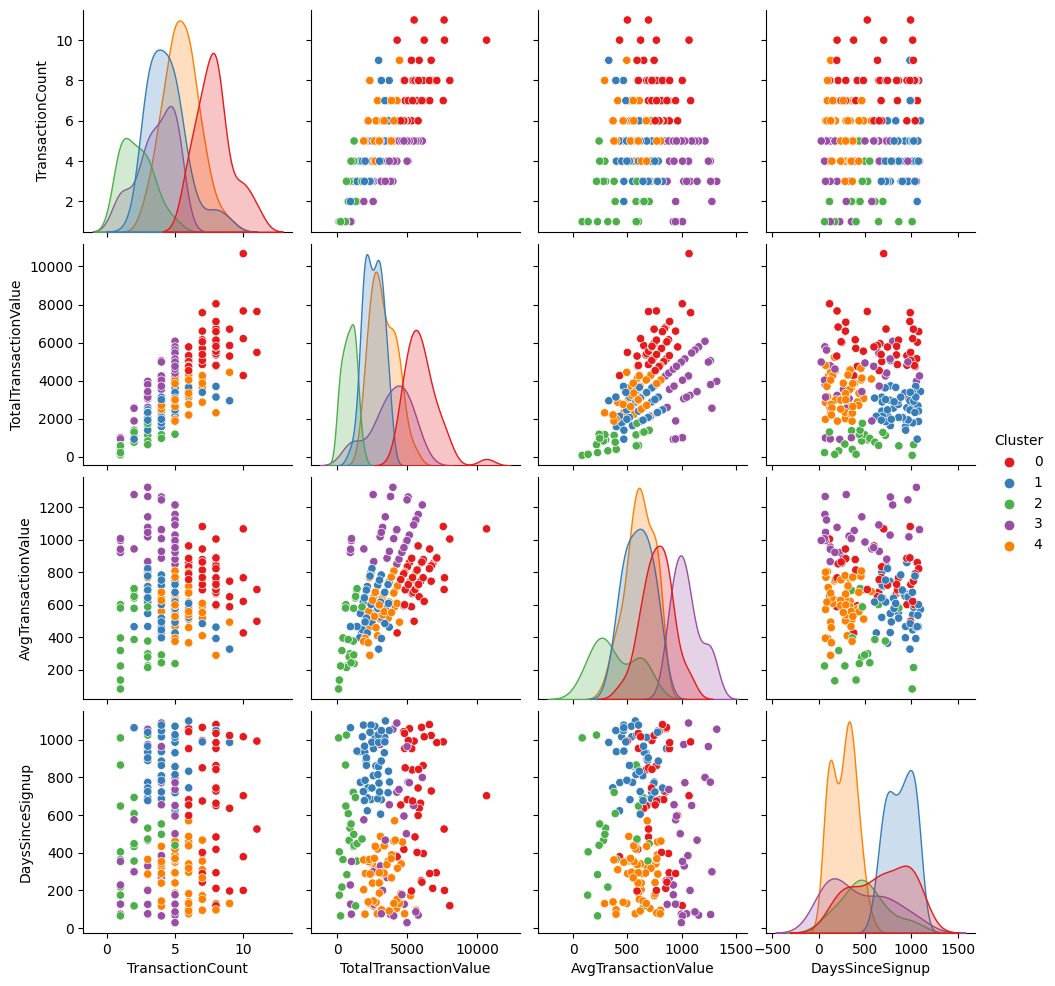

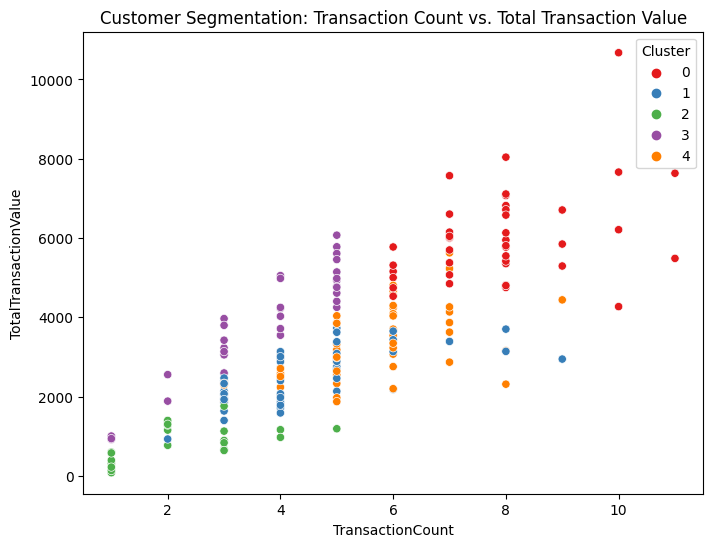

In [22]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow')
plt.title(f'KMeans Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

sns.pairplot(features_df, hue='Cluster', palette='Set1', diag_kind='kde')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TransactionCount', y='TotalTransactionValue', hue='Cluster', data=features_df, palette='Set1')
plt.title('Customer Segmentation: Transaction Count vs. Total Transaction Value')
plt.show()